## Infogroup EDA

In [1]:
import pandas as pd
import numpy as np
import json
from pipeline.clean import clean_infogroup
from pipeline.constants import RAW_INFOGROUP_FPATH, CLEANED_INFOGROUP_FPATH, \
                                INFOGROUP_2022, CONFIG_FPATH

In [2]:
info_2022 = pd.read_csv(INFOGROUP_2022)
info_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    720 non-null    int64  
 1   COMPANY                       720 non-null    object 
 2   ADDRESS LINE 1                701 non-null    object 
 3   CITY                          720 non-null    object 
 4   STATE                         720 non-null    object 
 5   ZIPCODE                       720 non-null    float64
 6   ZIP4                          586 non-null    float64
 7   COUNTY CODE                   720 non-null    float64
 8   AREA CODE                     720 non-null    int64  
 9   IDCODE                        720 non-null    int64  
 10  LOCATION EMPLOYEE SIZE CODE   716 non-null    object 
 11  LOCATION SALES VOLUME CODE    674 non-null    object 
 12  PRIMARY SIC CODE              720 non-null    int64  
 13  SIC6_

## To clean the infogroup dataset, we:
#### Made a large dataframe that contained each individual year's dataset, from 1997 to 2022, standardized column names to be all uppercase, turned NaNs to 0s, turned float64 categorical variables (such as YEAR ESTABLISHED) into int64s, and added a column for parent names using the parent company ABIs

In [3]:
js = open(CONFIG_FPATH).read()
ABI_dict = json.loads(js)

In [4]:
filter = False

clean_infogroup(RAW_INFOGROUP_FPATH, ABI_dict, '2015', filter)
df = pd.read_csv(CLEANED_INFOGROUP_FPATH, index_col=0)
df.head(5)

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,PRIMARY SIC CODE,ARCHIVE VERSION YEAR,YEAR ESTABLISHED,ABI,SALES VOLUME (9) - LOCATION,COMPANY HOLDING STATUS,PARENT NUMBER,PARENT NAME,LATITUDE,LONGITUDE,YEAR 1ST APPEARED
0,TYSON FOODS INC,5421 W BEAVER ST,JACKSONVILLE,FL,32254.0,201501.0,1997.0,0,456474451.0,116100.0,0.0,7537913,Small Biz,30.326801,-81.741302,0
1,PECO FOODS INC,3701 KAULOOSA AVE,TUSCALOOSA,AL,35401.0,201501.0,1997.0,0,166231.0,140000.0,0.0,0,Small Biz,33.178114,-87.561440,0
2,GOLD KIST INC,1001 HIGHWAY 78 BYP W,JASPER,AL,35501.0,201501.0,1997.0,0,133681577.0,2085.0,0.0,1941509,Small Biz,33.848245,-87.289162,0
3,KING FOODS,641 HOLLY ST NE,DECATUR,AL,35601.0,201501.0,1997.0,0,886923978.0,7740.0,0.0,0,Small Biz,34.604495,-86.978356,0
4,WAYNE FARMS,IPSCO ST,DECATUR,AL,35601.0,201501.0,1997.0,0,635771.0,129000.0,0.0,0,Small Biz,34.593707,-86.996174,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16336 entries, 0 to 16342
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COMPANY                      16336 non-null  object 
 1   ADDRESS LINE 1               16116 non-null  object 
 2   CITY                         16336 non-null  object 
 3   STATE                        16336 non-null  object 
 4   ZIPCODE                      16336 non-null  float64
 5   PRIMARY SIC CODE             16336 non-null  float64
 6   ARCHIVE VERSION YEAR         16336 non-null  float64
 7   YEAR ESTABLISHED             16336 non-null  int64  
 8   ABI                          16336 non-null  float64
 9   SALES VOLUME (9) - LOCATION  15588 non-null  float64
 10  COMPANY HOLDING STATUS       2619 non-null   float64
 11  PARENT NUMBER                16336 non-null  int64  
 12  PARENT NAME                  16336 non-null  object 
 13  LATITUDE        

<AxesSubplot: title={'center': 'Number of Plants by State'}, ylabel='Count'>

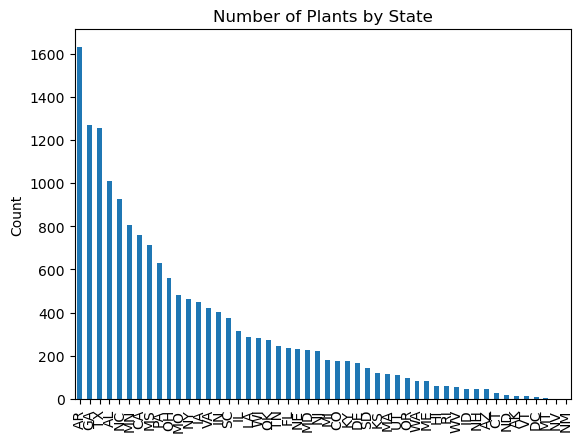

In [6]:
df["STATE"].value_counts().plot(kind="bar", title="Number of Plants by State", ylabel="Count")

## Brief Analysis & Exploration

In [7]:
unique_buisnesses = df.drop_duplicates(subset=['ABI'])
print("There are", len(unique_buisnesses), "businesses with unique ABI codes within this dataset")

There are 2166 businesses with unique ABI codes within this dataset


### Using ABI to track businesses across the years

##### The ABI is the unique number assigned to each business in the infogroup database. A business's ABI number will not vary by year. Because of this, we can use the ABI number to perform record linkage on the infogroup data, from 1997 to 2022. 

In [8]:
# I.E. ABI 512247248
ex_ABI = df.loc[df.ABI == 512247248].reset_index(drop=True)
ex_ABI.head(5)

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,PRIMARY SIC CODE,ARCHIVE VERSION YEAR,YEAR ESTABLISHED,ABI,SALES VOLUME (9) - LOCATION,COMPANY HOLDING STATUS,PARENT NUMBER,PARENT NAME,LATITUDE,LONGITUDE,YEAR 1ST APPEARED
0,SIMMONS FOODS,PO BOX V,VAN BUREN,AR,72956.0,201501.0,1999.0,0,512247248.0,116100.0,0.0,0,Small Biz,35.455247,-94.339599,0
1,SIMMONS FOODS,PO BOX V,VAN BUREN,AR,72956.0,201501.0,2000.0,0,512247248.0,116100.0,0.0,0,Small Biz,35.455247,-94.339599,0
2,SIMMONS FOODS,PO BOX V,VAN BUREN,AR,72956.0,201501.0,2001.0,0,512247248.0,116100.0,0.0,0,Small Biz,35.455247,-94.339599,0
3,SIMMONS FOODS,PO BOX V,VAN BUREN,AR,72956.0,201501.0,2002.0,0,512247248.0,116100.0,0.0,0,Small Biz,35.455247,-94.339599,0
4,SIMMONS FOODS,2101 TWIN CIRCLE DR,VAN BUREN,AR,72956.0,201501.0,2003.0,0,512247248.0,116100.0,NaN,0,Small Biz,35.428060,-94.336720,0
